# MOwNiT
## Julia Smerdel
### Laboratorium 1, Zadanie 1







Program do obliczania iloczynu skalarnego wektorów.

In [1]:
using LinearAlgebra
function dotVector(vecSize)
    
    #pierwsze wywołanie z czasem kompilacji
    vec1 = rand(vecSize);
    vec2 = rand(vecSize)
    dot(vec1, vec2)
    
    ans = [];
    
    for i in 1:10
        vec1 = rand(vecSize);
        vec2 = rand(vecSize)
        push!(ans, @elapsed dot(vec1, vec2))
    end
    
    return ans
        
end

    

dotVector (generic function with 1 method)

Program do mnożenia macierzy kwadratowej przez wektor z użyciem operatora *.


In [2]:
function matrixVector(size)
    
    #pierwsze wywołanie z czasem kompliacji
    matrix = rand(Float64, (size, size));
    vector = rand(size);
    
    ans = [];
    
    for i in 1:10
        matrix = rand(size, size);
        vector = rand(size);
        push!(ans, @elapsed *(matrix, vector))
    end
    
    
    return ans
end

matrixVector (generic function with 1 method)

Przypisanie danych do pliku CSV.

In [3]:
using CSV
using DataFrames
sizes = [100, 500, 1000, 1500, 2500, 4000, 5000];
CSV.write("homework1.csv", [], writeheader=true, header=["size", "dotTime", "matrixTime"], delim=";")

#zapisanie z użyciem kosntruktora
for i in sizes
    df = DataFrame(size = repeat([i], 10),
        dotTime = dotVector(i),
        matrixTime = matrixVector(i)
        );
    CSV.write("homework1.csv", df, append=true, delim=";")
end

Wczytanie danych z pliku CSV

In [4]:
using CSV
input = "homework1.csv";
mydata = CSV.read(input, delim=";", DataFrame)

Row,size,dotTime,matrixTime
,Int64,Float64,Float64
1,100,4.0e-7,0.0003807
2,100,0.0,9.72e-5
3,100,1.0e-7,8.69e-5
4,100,0.0,8.9e-5
5,100,1.0e-7,8.89e-5
6,100,1.0e-7,8.41e-5
7,100,1.0e-7,5.75e-5
8,100,1.0e-7,8.03e-5
9,100,1.0e-7,5.34e-5


Obliczanie średniej oraz odchylenia standardowego, wykresy średnich czasów obliczenia, słupki błędów.

In [5]:
using Statistics

currDf = mydata[1:10, :]
stats = DataFrame(size = 100, avgDotTime = mean(currDf.dotTime), stdmDotTime = stdm(currDf.dotTime, mean(currDf.dotTime)), 
            avgMatrixTime = mean(currDf.matrixTime), stdmMatrixTime = stdm(currDf.matrixTime, mean(currDf.matrixTime)))
iter = 1;

for i in 20:10:70
    sizes = [500, 1000, 1500, 2500, 4000, 5000];
    currDf = mydata[i-9:i, :]
    stats2 = [sizes[iter], mean(currDf.dotTime), stdm(currDf.dotTime, mean(currDf.dotTime)), 
            mean(currDf.matrixTime), stdm(currDf.matrixTime, mean(currDf.matrixTime))]
    push!(stats, stats2)
    iter += 1;
end
show(stats)

7×5 DataFrame
 Row │ size   avgDotTime  stdmDotTime  avgMatrixTime  stdmMatrixTime 
     │ Int64  Float64     Float64      Float64        Float64        
─────┼───────────────────────────────────────────────────────────────
   1 │   100      1.0e-7   1.1547e-7      0.00010441     9.94996e-5
   2 │   500      1.4e-7   6.99206e-8     0.00015693     4.11695e-5
   3 │  1000      1.6e-7   1.07497e-7     0.00061832     4.21707e-5
   4 │  1500      1.4e-7   5.16398e-8     0.00127587     0.000133268
   5 │  2500      3.4e-7   5.16398e-8     0.00365183     0.000257323
   6 │  4000      6.3e-7   4.83046e-8     0.00960766     0.00286629
   7 │  5000      7.9e-7   5.67646e-8     0.0133987      0.000847909

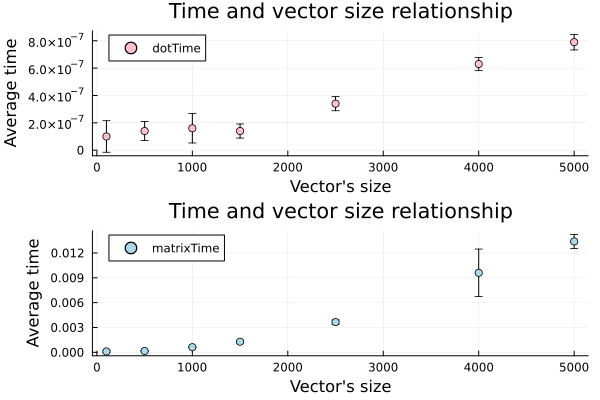

In [19]:
using Plots
scatter(stats.size, [stats.avgDotTime, stats.avgMatrixTime], colour=[:pink :lightblue], layout=(2,1), yerr=[stats.stdmDotTime stats.stdmMatrixTime],
label=["dotTime" "matrixTime"], xlabel="Vector's size", ylabel="Average time", title="Time and vector size relationship")